# Schrodinger Solver

In [1]:
%matplotlib notebook
import sys
ver=sys.version_info.major
if ver==2:
    from utilsTimmy import *
elif ver==3:
    from utils3 import *
else:
    print("Python version not recognized. Python 2.5 or greater required.")
import numpy as np

## Note about units
We will be using atomic units throughout.

In [2]:
# atomic units
hbar=1.0
m=1.0
#set precision of numerical approximation
steps=2000

## Particle in Harmonic Well


*******************************************************************************
                           Schrodinger Solver Output                           
                        Matthew Srnec and Shiv Upadhyay                        
*******************************************************************************
                          Particle in a harmonic well                          

		Input:
                              Force Constant : 1                               
                                   Depth : 2                                   

		18 lowest Bound States:
                           E(0)=-15.804470392510465                            
                           E(1)=-15.173816738879971                            
                           E(2)=-13.994126902446212                            
                            E(3)=-13.52009183018036                            
                           E(4)=-12.209707587617629                            
  

<IPython.core.display.Javascript object>


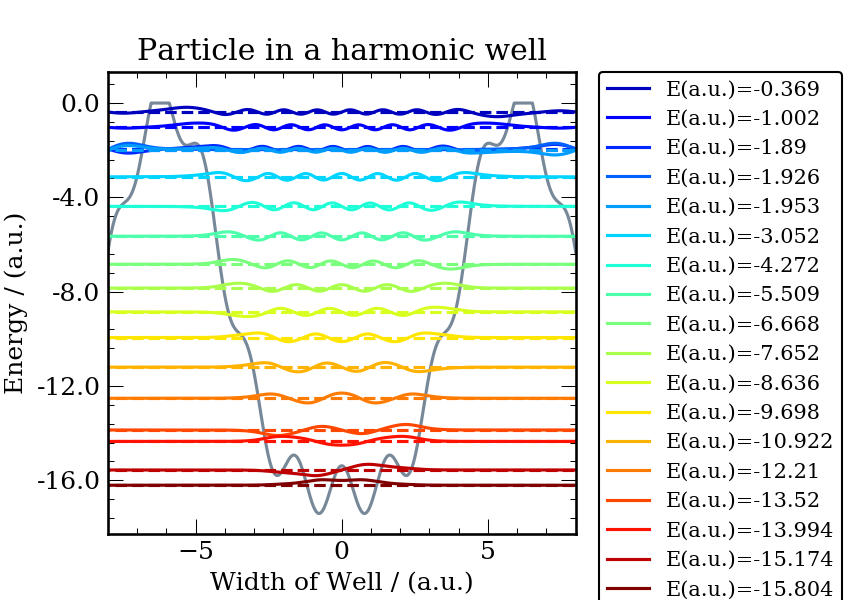

113.51765765348898 56.758828826744484
212.34417055807668 162.93091410578282
85.32631300785316 205.5940706097094
235.86916366129165 323.5286524403553
231.70941830165418 439.38336159118234
220.42215491190464 549.5944390471348
191.17279832727846 645.1808382107739
177.05863619177998 733.7101563066639
177.1898934718006 822.3051030425642
208.50854111211547 926.5593735986218


In [3]:
########
# PARTICLE IN A HARMONIC WELL OF DEPTH (D) WITH A FORCE CONSTANT (omega)
########
Case=5
########
# INPUT
########
# set force constant and depth of harmonic well
omega=1 # this value must be between 0.3 and 1.4
D=2 # this value must be between 2 and 15
########
# CODE
########
# divide by two so a well from -W to W is of input width
W=np.sqrt(np.abs(2.0*-D)/(omega**2))
# set length variable for xvec
A=W*4.0
# create x-vector from -A to A
xvec=np.linspace(-A,A,steps,dtype=np.float_)
# get step size
h=xvec[1]-xvec[0]
# create the potential from harmonic potential function
U=harmonic_potential(xvec,omega,-D)
# create Laplacian via 3-point finite-difference method
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
    +np.diag(np.ones(steps-1),-1))/(float)(h**2)
# create the Hamiltonian
Hamiltonian=np.zeros((steps,steps))
[i,j] = np.indices(Hamiltonian.shape)
Hamiltonian[i==j]=U
Hamiltonian+=(-0.5)*((hbar**2)/m)*Laplacian
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E,V=diagonalize_hamiltonian(Hamiltonian)
# determine theoretical number of energy levels (n)
n=0
while E[n]<0:
    n+=1
# print output
output(Case,['Force Constant','Depth'],[omega,D],E,n)
# create plot
finite_well_plot(E,V,xvec,steps,n,Case,U)
for i in range(10):
    print (E[i+1]-E[i])*27000/100/1.5,(E[i+1]-E[0])*27*1e3/100/3